# Intro

In [1]:
%matplotlib inline
import numpy as np

In [2]:
np.random.seed(37)

means = np.array([10.0, 20.0, 30.0], dtype=np.float64)
cov = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], dtype=np.float64)
data = np.random.multivariate_normal(means, cov, 100)

In [3]:
np.isnan(data).any()

False

In [4]:
null_indices = []
num_rows = data.shape[0]
num_cols = data.shape[1]

indices_pairs = set()
while len(null_indices) < 10:
    r = np.random.randint(num_rows)
    c = np.random.randint(num_cols)
    key = '{}-{}'.format(r, c)
    if key not in indices_pairs:
        indices_pairs.add(key)
        t = (r, c)
        null_indices.append(t)

In [5]:
for pair in null_indices:
    r = pair[0]
    c = pair[1]
    data[r][c] = None
    print('set data[{}][{}] = None'.format(r, c))

set data[35][1] = None
set data[29][1] = None
set data[58][1] = None
set data[85][0] = None
set data[74][2] = None
set data[49][2] = None
set data[13][2] = None
set data[71][0] = None
set data[25][1] = None
set data[28][1] = None


In [6]:
np.isnan(data).any()

True

In [7]:
np.mean(data, axis=0)

array([nan, nan, nan])

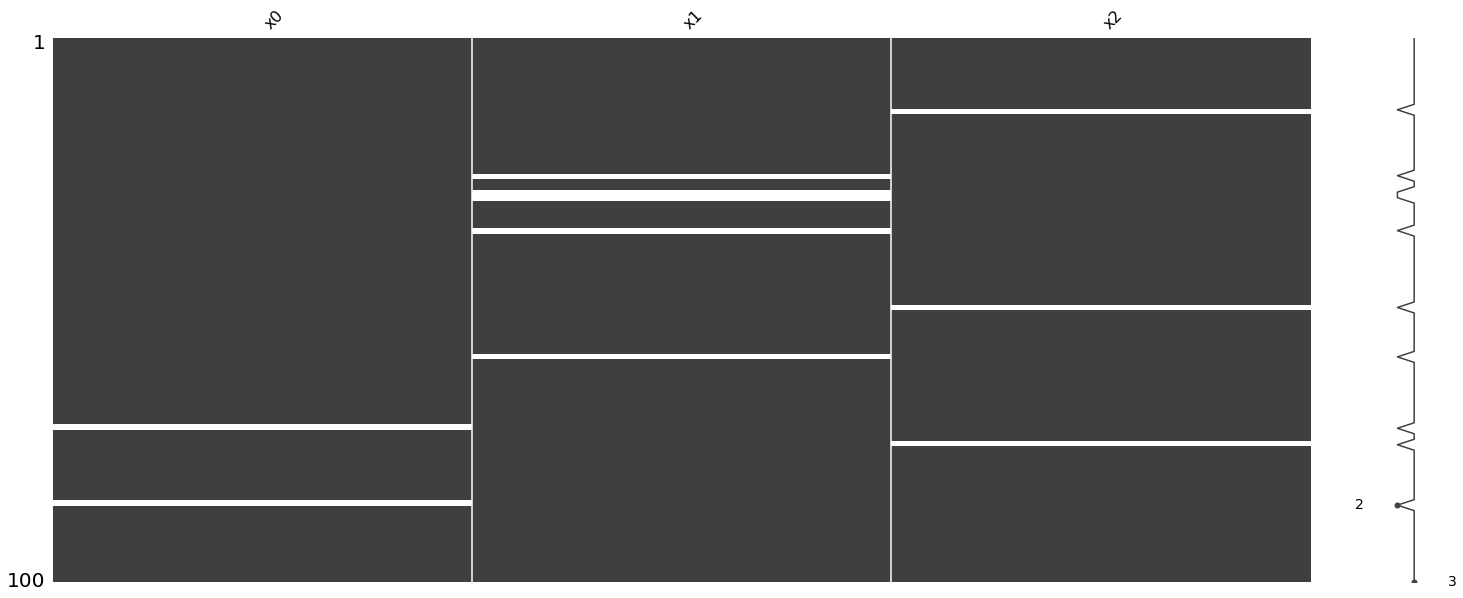

In [8]:
import missingno as msno
import matplotlib
import pandas as pd

data_df = pd.DataFrame(data, columns=['x{}'.format(c) for c in range(data.shape[1])])
msno.matrix(data_df)

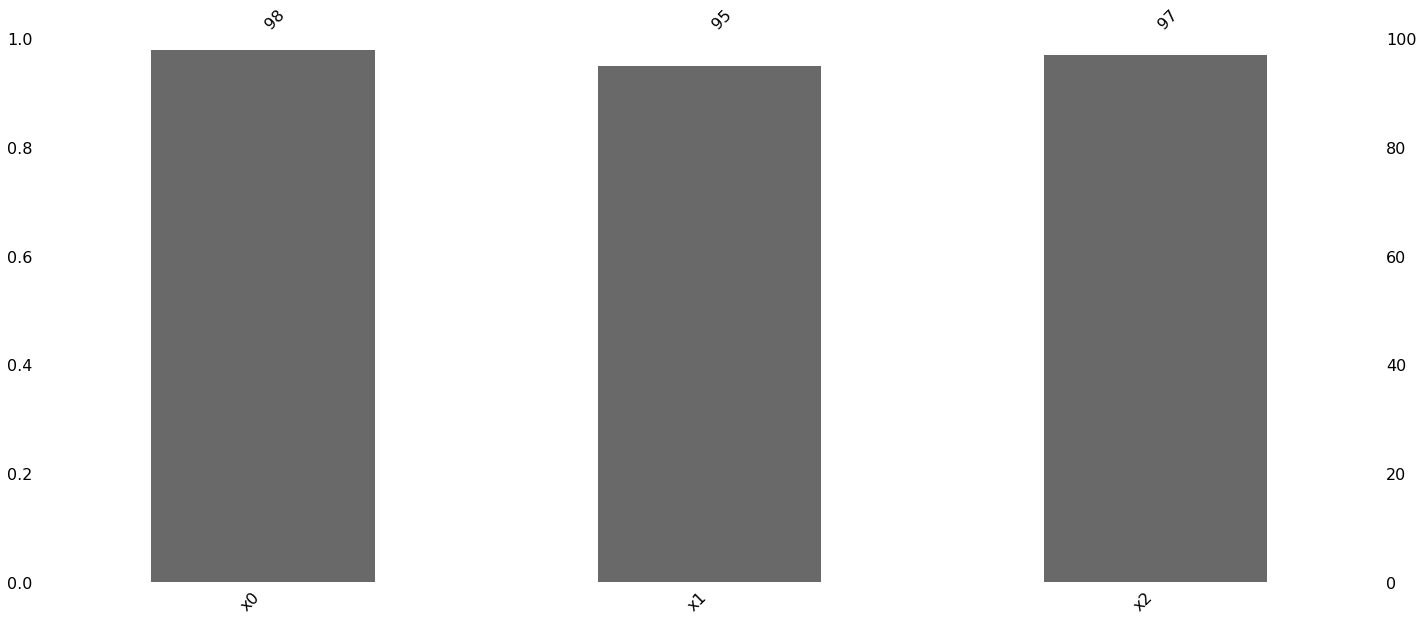

In [9]:
msno.bar(data_df)

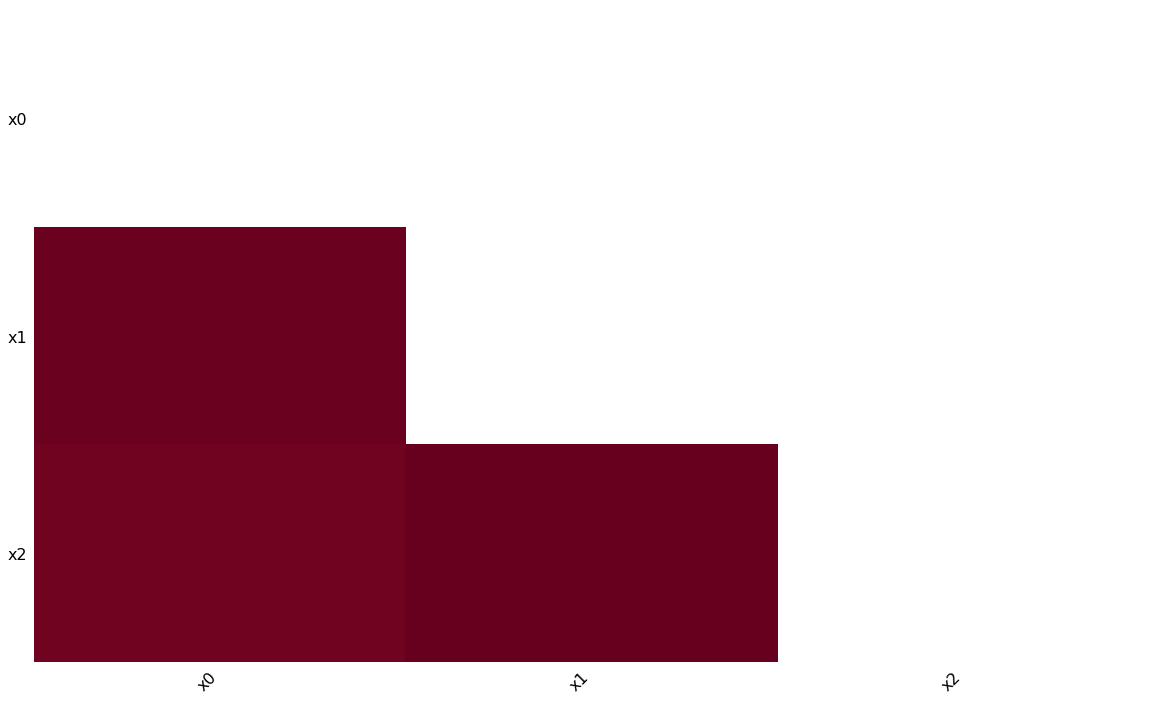

In [10]:
msno.heatmap(data_df)

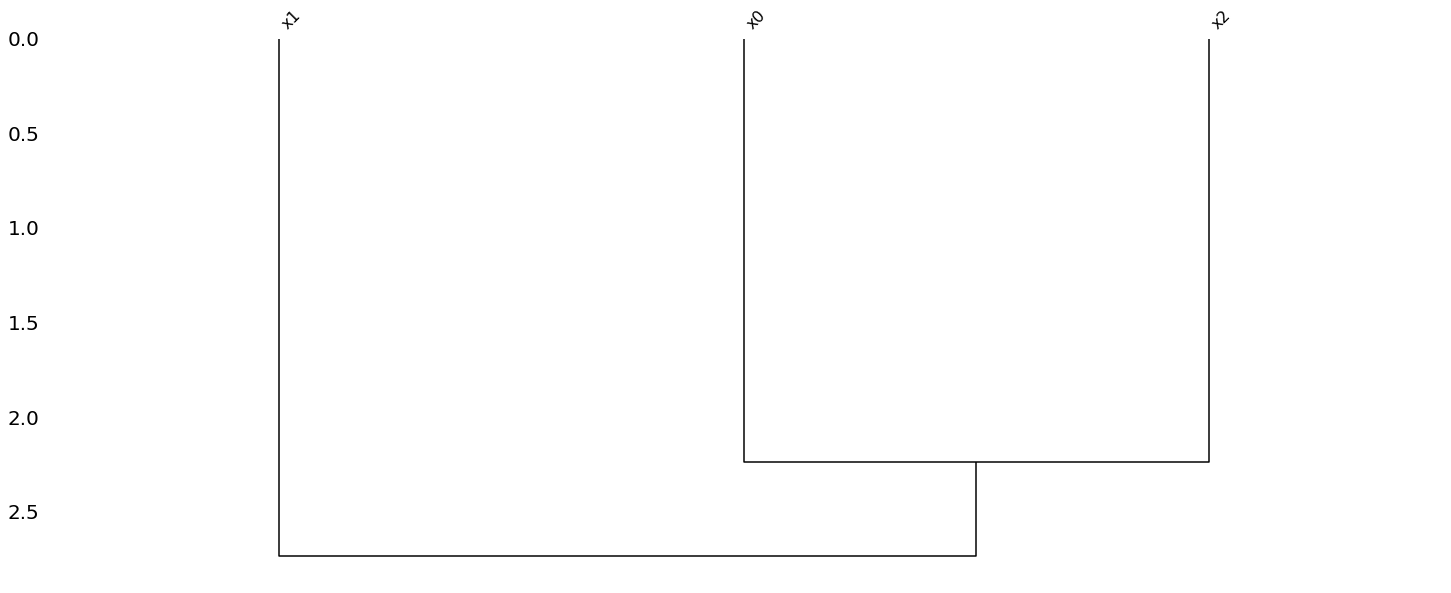

In [11]:
msno.dendrogram(data_df)

In [12]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\super\Anaconda3\envs\ds-missing\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\super\Anaconda3\envs\ds-missing\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\super\Anaconda3\envs\ds-missing\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\super\Anaconda3\envs\ds-missing\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\super\Anaconda3\envs\ds-missing\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

# References

* [Missing Data Conundrum: Exploration and Imputation Techniques](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87)
* [Failed to load the native TensorFlow runtime](https://github.com/tensorflow/tensorflow/issues/18503)
